# 📊 UK Housing Market Analysis
### Author: Aston Crawley

In [1]:
# ============== 1. Setup ==============
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# ============== 2. Data Loading ==============
# Load HM Land Registry Housing Price Index data
df = pd.read_csv(os.path.join("..", "data", "UK-HPI.csv"))

In [3]:
# Preview data
print(df.head())
df.info()
df.describe()

         Date     RegionName   AreaCode  AveragePrice  Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034         84638   41.1      NaN   
1  01/02/2004  Aberdeenshire  S12000034         84623   41.1      NaN   
2  01/03/2004  Aberdeenshire  S12000034         86536   42.1      NaN   
3  01/04/2004  Aberdeenshire  S12000034         87373   42.5      NaN   
4  01/05/2004  Aberdeenshire  S12000034         89493   43.5      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...  NewPrice  \
0        NaN         NaN             NaN        388.0  ...  112843.0   
1        0.0         NaN             NaN        326.0  ...  113061.0   
2        2.3         NaN             NaN        453.0  ...  115218.0   
3        1.0         NaN             NaN        571.0  ...  115247.0   
4        2.4         NaN             NaN        502.0  ...  117377.0   

   NewIndex  New1m%Change  New12m%Change  NewSalesVolume  OldPrice  OldIndex  \
0      40.7           NaN            NaN        

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
count,1.466550e+05,146655.000000,5154.000000,146202.000000,141795.000000,5154.000000,142188.000000,1.399260e+05,139926.000000,139531.000000,...,1.393000e+05,139300.000000,138904.000000,134572.000000,136664.000000,1.395040e+05,139504.000000,139108.000000,134776.000000,139494.000000
mean,1.810517e+05,59.142052,61.440202,0.529697,6.174255,166900.153473,1252.359946,3.380892e+05,59.240867,0.466035,...,2.170467e+05,60.930594,0.511036,6.289533,136.180143,1.827488e+05,59.362630,0.475495,6.127842,1137.270141
std,1.299621e+05,26.271481,24.694455,1.941392,8.668794,93842.437009,7706.585599,3.394136e+05,24.833194,1.704025,...,1.326025e+05,25.971427,1.761121,8.026816,845.480479,1.296946e+05,25.164181,1.735907,8.454995,6961.599239
min,2.553000e+03,0.800000,13.900000,-30.300000,-35.800000,39008.000000,2.000000,4.011700e+04,9.400000,-19.600000,...,2.244300e+04,8.000000,-29.800000,-28.900000,1.000000,2.271600e+04,9.000000,-30.600000,-30.300000,2.000000
25%,9.949650e+04,37.200000,45.725000,-0.500000,1.100000,114598.250000,140.000000,1.770972e+05,40.325000,-0.500000,...,1.264068e+05,41.400000,-0.500000,1.700000,10.000000,1.011922e+05,39.900000,-0.500000,1.100000,126.000000
50%,1.529120e+05,60.600000,61.950000,0.500000,5.200000,151857.500000,215.000000,2.574745e+05,59.600000,0.500000,...,1.960630e+05,61.100000,0.500000,5.400000,21.000000,1.532535e+05,60.400000,0.500000,5.200000,193.000000
75%,2.274725e+05,79.300000,79.600000,1.500000,10.200000,206122.500000,377.000000,3.909352e+05,78.800000,1.400000,...,2.742722e+05,81.600000,1.500000,10.200000,47.000000,2.281065e+05,78.500000,1.400000,10.300000,343.000000
max,1.656986e+06,153.100000,111.500000,35.300000,98.400000,574627.000000,183609.000000,5.820174e+06,147.000000,34.800000,...,1.414204e+06,149.600000,34.900000,96.200000,21097.000000,1.665089e+06,152.700000,35.600000,98.600000,166098.000000


In [4]:
# ============== 3. Data Cleaning ==============
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Select relevant columns for basic analysis
df = df[['Date', 'RegionName', 'AveragePrice']]

# Check for missing values
df.isnull().values.any()

# Sort values
df = df.sort_values(by=["RegionName", "Date"])

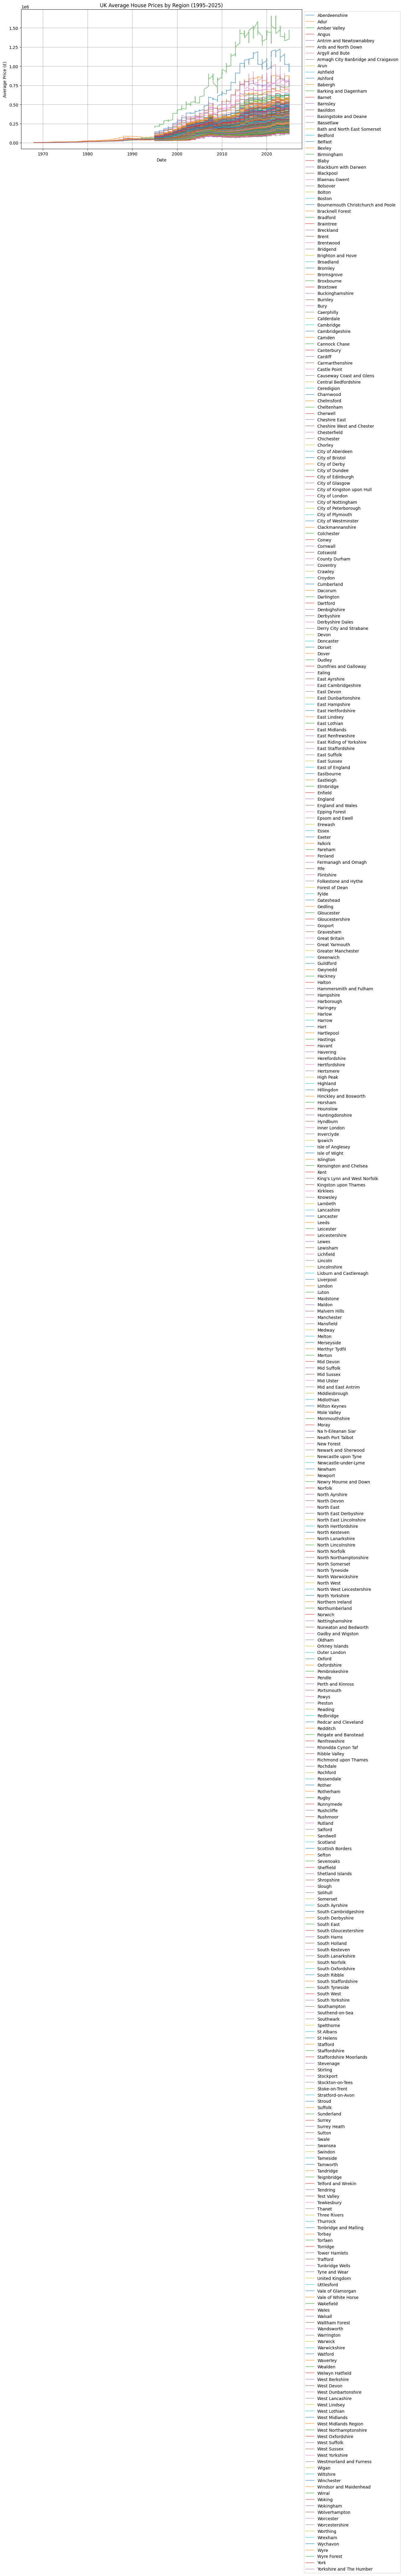

In [5]:
# ============== 4. Exploratory Data Analysis (EDA) ==============
# General Trends
plt.figure(figsize=(12,6))
for region in df['RegionName'].unique():
    subset = df[df['RegionName'] == region]
    plt.plot(subset['Date'], subset['AveragePrice'], label=region, alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Average Price (£)")
plt.title("UK Average House Prices by Region (1995–2025)")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

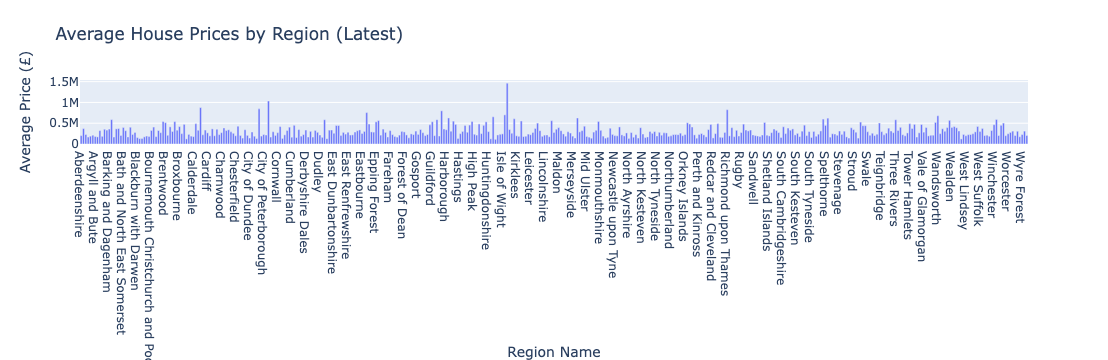

In [6]:
# Regional comparison at latest date
latest = df[df['Date'] == df['Date'].max()]
px.bar(latest, x="RegionName", y="AveragePrice", labels={"RegionName":"Region Name", "AveragePrice":"Average Price (£)"}, title="Average House Prices by Region (Latest)")

---

Both of these plots are clearly unreadable given the amount of regions involved in the dataset, therefore the following plots will show the monthly national average as well as some key regions for comparison

---

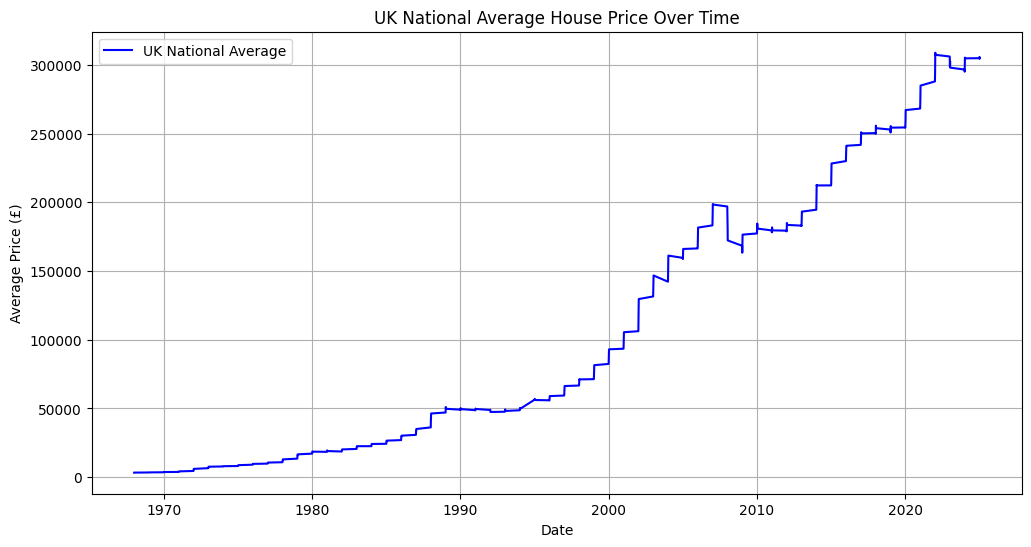

In [7]:
# Compute national average per date
national_avg = df.groupby("Date")["AveragePrice"].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(national_avg.index, national_avg.values, label="UK National Average", color="blue")
plt.xlabel("Date")
plt.ylabel("Average Price (£)")
plt.title("UK National Average House Price Over Time")
plt.legend()
plt.grid(True)
plt.show()